The test dataset contains four cloud detection categories:

| category           | count | relative |
| ------------------ | ----- | -------- |
| undefined          |     4 | 28.6%    |
| cloud_free         |     2 | 14.3%    |
| probably_cloudy    |     3 | 21.4%    |
| most_likely_cloudy |     5 | 35.7%    |

Note that the relative counts don't correspond to cloud fractions as the undefined values should not be taken into account for the computation of cloud fractions.

The true cloud fractions are:
* `probably_cloudy`: 30%
* `most_likely_cloudy`: 50%
* total (any of the two): 80%

In [1]:
using NCDatasets
using Statistics
ds = Dataset("test_cloud_flag_fill.nc");
collect(ds["cloud_flag"])

14-element Array{Union{Missing, Int16},1}:
  missing
 0
 1
 2
 1
 2
 0
 1
 2
 2
  missing
  missing
  missing
 2

The variable is a `Union{Missing, Int16}` :-)

# Mean cloudiness
This one is obviously wrong as the flag is not intended to be used as a numeric value:

In [2]:
mean(ds["cloud_flag"])

missing

... but we at least get warned :-) Let's change that:

In [3]:
mean(skipmissing(ds["cloud_flag"]))

1.3

... still wrong, but we knew that.

Let's have a look at the meanings:

In [4]:
meanings = Dict(zip(split(ds["cloud_flag"].attrib["flag_meanings"]), ds["cloud_flag"].attrib["flag_values"]))

Dict{SubString{String},Int16} with 3 entries:
  "most_likely_cloudy" => 2
  "cloud_free"         => 0
  "probably_cloudy"    => 1

Perfect, there are three valid classes. Let's check the cloud fraction:

In [5]:
mean(skipmissing(ds["cloud_flag"] .== meanings["most_likely_cloudy"]))

0.5

This is nice! Exactly the right number.

# how does the data look without thinking about it?

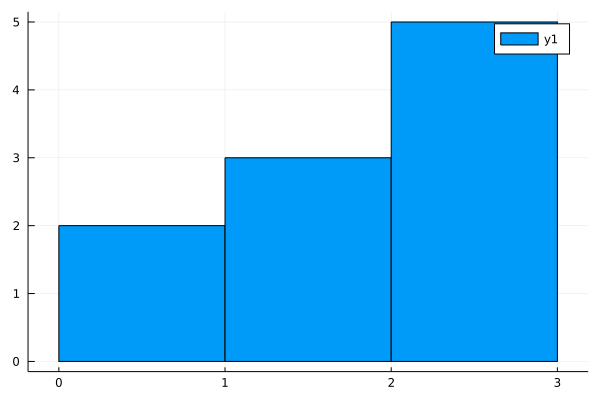

In [6]:
using Plots
histogram(collect(skipmissing(ds["cloud_flag"])))